# Can a Perceptron Think Logically? Exploring Logic Gates with Machine Learning

## Introduction
In this project, we simulate three common logic gates—**AND**, **XOR**, and **OR**—using a simple linear classifier, the **Perceptron** from scikit-learn. The goal is to explore how well a linear model can learn these functions. While the AND and OR gates are linearly separable, the XOR gate is not. This difference is clearly illustrated through performance metrics and visualizations.

### Understanding Logic Gates with Perceptron

The **Perceptron algorithm** is a simple machine learning model that works well for problems where the data is **linearly separable**—meaning a single straight line can divide the two output classes (0 and 1). However, when the data is **not linearly separable** (like in the XOR gate), the Perceptron struggles to classify it correctly.

Below is a visual representation of the behavior of different **logic gates**:

![Logic Gates and Decision Boundaries](https://content.codecademy.com/programs/machine-learning/perceptron/logic_gates.svg)

### Explanation of the Image:
- The **AND** and **OR** gates are **linearly separable**, meaning a straight line can correctly separate the 0s and 1s.
- The **XOR gate** is **not linearly separable**, as no single straight line can separate the classes.
- The **Perceptron model** will perform well on the AND and OR gates but will fail on the XOR gate.

In this project, we will:
1. Train a **Perceptron model** for each logic gate.
2. Evaluate its accuracy.
3. Visualize decision boundaries using **heatmaps and scatter plots**.
4. Perform **additional statistical analysis** to gain insights into model performance.


## Workflow Process
1. **Data Generation**: Define the input data (all binary combinations) and their corresponding labels for each logic gate.
2. **Visualization**: Plot the raw data points for each logic gate to visualize the underlying distribution.
3. **Model Training & Evaluation**: 
   - Train a Perceptron model on the data.
   - Calculate and print the model accuracy.
4. **Decision Boundary Exploration**:
   - Compute the decision function over a grid of points.
   - Generate a heatmap to visualize the absolute distance from the decision boundary.
5. **Additional EDA**:
   - Compute and display basic statistical summaries (min, max, mean, standard deviation) of the decision function values.
   - Plot a histogram of the decision function values to understand their distribution.
6. **Comparison Across Gates**: Repeat the process for each logic gate (AND, XOR, OR) and compare the outcomes.

---


##### Libraries we will use

In [1]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

#### Evaluating and Visualizing Logic Gates with a Perceptron Model  

To analyze the behavior of different **logic gates**, we will use a **Perceptron model** and evaluate its performance.  

##### Approach  

Instead of writing separate logic for each gate, we will first **define a function** that encapsulates the entire logic for training and visualizing the results. This function will handle:  

- **Data processing** for the three different gates.  
- **Model training** using the Perceptron algorithm.  
- **Evaluation** of accuracy and decision boundaries.  
- **Visualization** of the classification results.  

Since all logic gates follow a similar structure but differ in their input data and expected outputs, this function will serve as a **generalized solution**. Once the function is implemented, we can simply call it with any logic gate as a parameter to see the **Perceptron model in action**.  

Now, let's dive into the implementation!

In [2]:
def evaluate_logic_gate(gate_name, data, labels):
    
    print(f"Evaluating {gate_name} Gate")
    
    # Plot the raw data points
    plt.figure(figsize=(6, 4))
    plt.title(f"{gate_name} Gate - Data Points")
    plt.scatter([point[0] for point in data], [point[1] for point in data], c = labels, cmap='viridis', s = 100)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    #plt.grid(True)
    plt.show()
    
    # Initialize the Perceptron classifier
    classifier = Perceptron(max_iter=40, random_state=22)
    
    # Fit the model on the data
    classifier.fit(data, labels)
    
    # Calculate and print the model accuracy
    model_score = classifier.score(data, labels)
    print(f"{gate_name} Gate Model Score Accuracy: {model_score:.2f}")
    
    # Create a grid of 100x100 points between 0 and 1 for visualization, we will use Numpy array manipulation
    x_values = np.linspace(0, 1, 100)
    y_values = np.linspace(0, 1, 100)
    point_grid = list(product(x_values, y_values))
    
    # Compute the decision function over the grid
    distances = classifier.decision_function(point_grid)
    
    # Additional EDA: Compute basic statistical summaries for the decision function values
    distances_array = np.array(distances)
    print(f"\nDecision Function Statistics for {gate_name} Gate:")
    print(f"  Min distance: {distances_array.min():.2f}")
    print(f"  Max distance: {distances_array.max():.2f}")
    print(f"  Mean distance: {distances_array.mean():.2f}")
    print(f"  Std deviation: {distances_array.std():.2f}\n")
    
    # Plot heatmap: Visualize the absolute distance from the decision boundary
    abs_distances = np.abs(distances)
    distances_matrix = abs_distances.reshape((100, 100))
    plt.figure(figsize=(6, 4))
    plt.title(f"{gate_name} Gate - Decision Boundary Heatmap")
    heatmap = plt.pcolormesh(x_values, y_values, distances_matrix) 
    plt.colorbar(heatmap, label='Absolute Distance from Decision Boundary')
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()
    
    # Additional EDA: Plot a histogram of the decision function values
    plt.figure(figsize=(6, 4))
    plt.title(f"{gate_name} Gate - Histogram of Decision Function Values")
    plt.hist(distances, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel("Decision Function Value")
    plt.ylabel("Frequency")
    #plt.grid(True)
    plt.show()
    
    print("\n" + "\n")

### We evaluate the AND Gate

Evaluating AND Gate


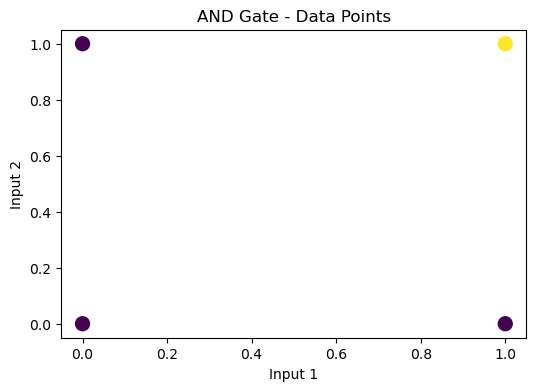

AND Gate Model Score Accuracy: 1.00

Decision Function Statistics for AND Gate:
  Min distance: -4.00
  Max distance: 1.00
  Mean distance: -1.50
  Std deviation: 1.05



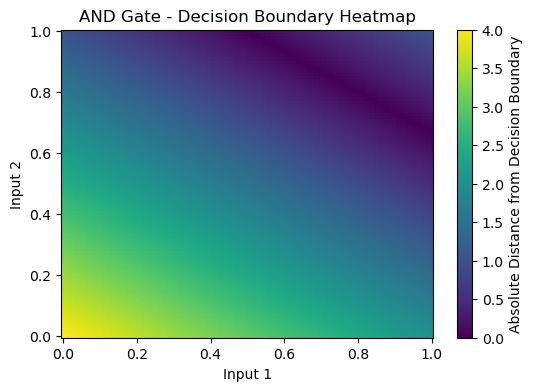

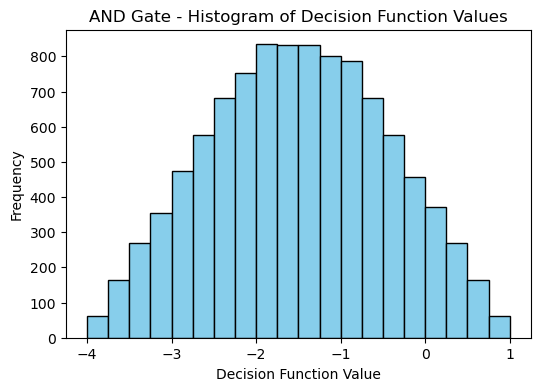

In [3]:
and_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
and_labels = [0, 0, 0, 1]
evaluate_logic_gate("AND", and_data, and_labels)

### We evaluate the XOR Gate

Evaluating XOR Gate


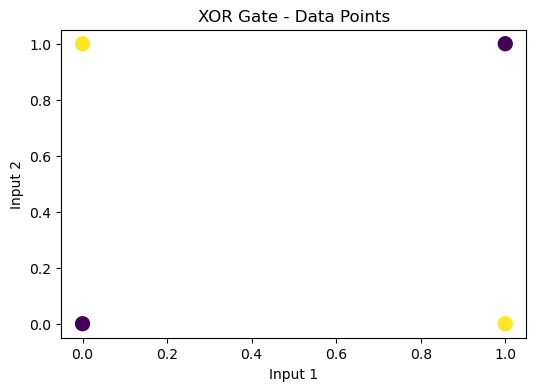

XOR Gate Model Score Accuracy: 0.50

Decision Function Statistics for XOR Gate:
  Min distance: -1.00
  Max distance: 0.00
  Mean distance: -0.50
  Std deviation: 0.29



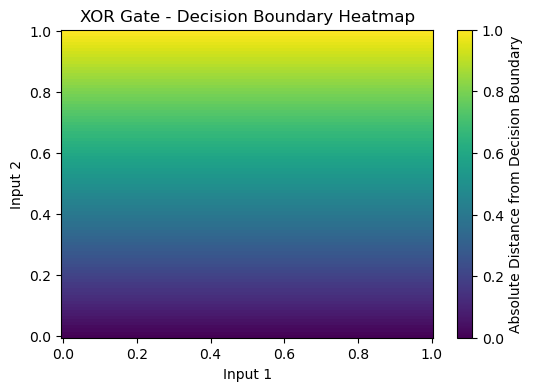

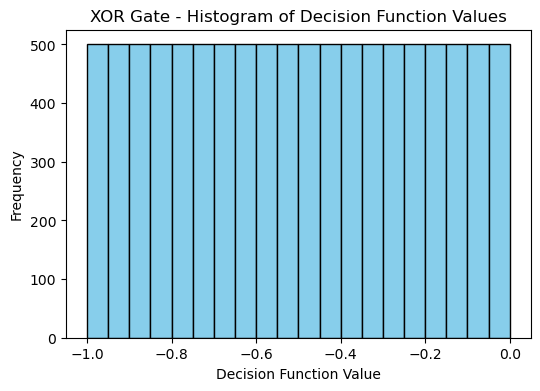

In [4]:
xor_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
xor_labels = [0, 1, 1, 0]
evaluate_logic_gate("XOR", xor_data, xor_labels)

### Evaluate the OR Gate

Evaluating OR Gate


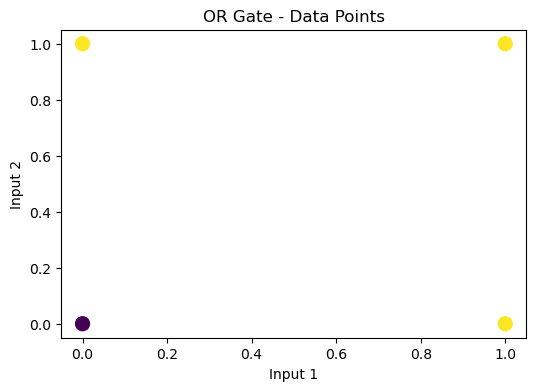

OR Gate Model Score Accuracy: 1.00

Decision Function Statistics for OR Gate:
  Min distance: -1.00
  Max distance: 3.00
  Mean distance: 1.00
  Std deviation: 0.82



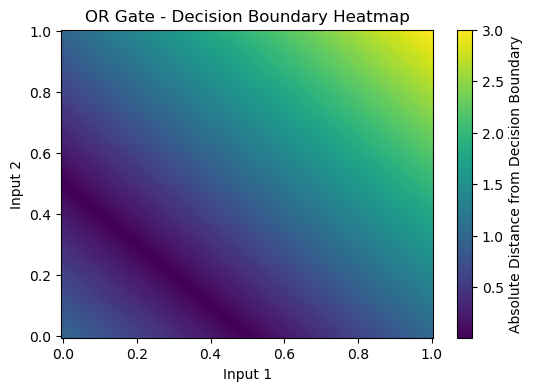

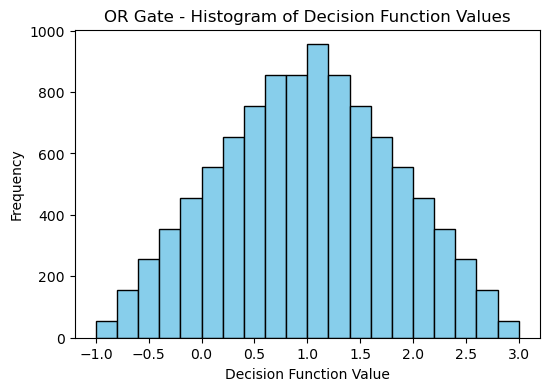

In [5]:
or_data = [[0, 0], [1, 0], [0, 1], [1, 1]]
or_labels = [0, 1, 1, 1]
evaluate_logic_gate("OR", or_data, or_labels)

---

## Summary
- **AND Gate**: The model achieves perfect accuracy as this is a linearly separable problem. The decision boundary correctly isolates the single positive instance.
- **XOR Gate**: The Perceptron fails to correctly classify the XOR gate, highlighting the limitation of linear models on non-linearly separable data.
- **OR Gate**: Similar to the AND gate, the OR gate is linearly separable, and the Perceptron correctly classifies the data with perfect accuracy.

## Conclusion & Insights
- **Linear Separability**: The Perceptron performs well for linearly separable functions (AND and OR), but it cannot capture the non-linear pattern present in the XOR function.
- **Visualization Benefits**: The heatmaps and histograms provide intuitive insights into the decision boundaries and the distribution of decision function values.
- **Model Limitations**: The inability to model the XOR gate underscores the importance of choosing more complex or non-linear models (e.g., neural networks with hidden layers) when dealing with non-linear separable problems.